<a href="https://colab.research.google.com/github/devdamasceno/dataPython/blob/main/cats_dogs_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.ZKTC9G_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 406s 684ms/step - accuracy: 0.9349 - loss: 0.1634 - val_accuracy: 0.9759 - val_loss: 0.0644
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 395s 677ms/step - accuracy: 0.9789 - loss: 0.0598 - val_accuracy: 0.9787 - val_loss: 0.0605
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 441s 675ms/step - accuracy: 0.9810 - loss: 0.0544 - val_accuracy: 0.9796 - val_loss: 0.0573
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 395s 674ms/step - accuracy: 0.9837 - loss: 0.0489 - val_accuracy: 0.9800 - val_loss: 0.0577
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 396s 678ms/step - accuracy: 0.9849 - loss: 0.0444 - val_accuracy: 0.9783 - val_loss: 0.0596


Acurácia treino: 0.98, validação: 0.98


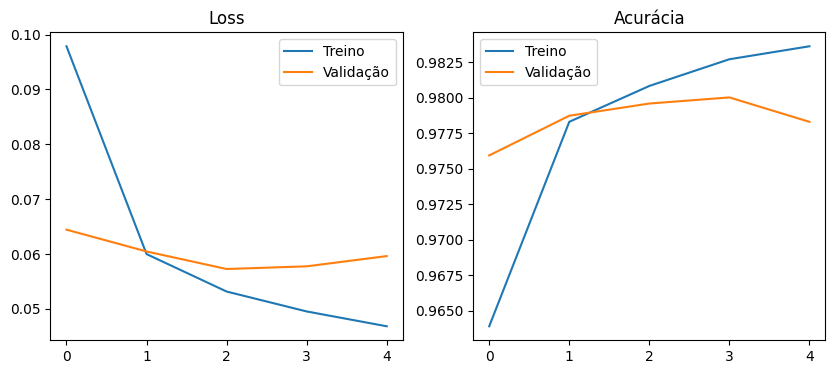

In [1]:
# Transfer Learning com MobileNetV2 e dataset cats_vs_dogs - Projeto DIO

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# Carregando o dataset cats_vs_dogs
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)

# Função para padronizar imagens
def preprocess(image, label):
    image = tf.image.resize(image, (160, 160))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Aplicando o preprocessamento
train_batches = train_ds.map(preprocess).shuffle(1000).batch(32).prefetch(1)
val_batches = val_ds.map(preprocess).batch(32).prefetch(1)

# Modelo base: MobileNetV2
IMG_SHAPE = (160, 160, 3)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

# Adicionando o cabeçalho personalizado
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(train_batches,
                    epochs=5,
                    validation_data=val_batches)

# Avaliando desempenho
acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f"Acurácia treino: {acc:.2f}, validação: {val_acc:.2f}")

# Salvando o modelo
model.save("cats_vs_dogs_transfer_model.h5")

# Plotando desempenho
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.legend()
plt.show()
